In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.utils import save_image
from PIL import Image

# 定义一个简单的深度网络作为 Deep Image Prior
class DIP(nn.Module):
    def __init__(self):
        super(DIP, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 读取输入图像并进行预处理
def preprocess_image(image_path):
    image = Image.open(image_path)
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()
    ])
    image = transform(image).unsqueeze(0)
    return image

# 定义训练函数
def train_dip(model, input_image, num_iterations=1000, lr=0.1):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    for i in range(num_iterations):
        output_image = model(input_image)
        loss = criterion(output_image, answer_image)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Iteration [{i+1}/{num_iterations}], Loss: {loss.item()}")
            save_image(output_image, f"output_image_denoised{(int)((i+1)/100)}.jpg")

    return output_image

if __name__ == "__main__":
    # 定义超参数
    answer_path = "/content/answer.jpg"
    image_path = "/content/input.jpg"
    output_path = "output_image_denoised.jpg"
    num_iterations = 1500
    learning_rate = 0.0001

    # 准备输入图像并创建 Deep Image Prior 模型
    input_image = preprocess_image(image_path)
    answer_image = preprocess_image(answer_path)
    model = DIP()

    # 将模型设置为训练模式并进行训练
    model.train()
    output_image = train_dip(model, input_image, num_iterations, learning_rate)

    # 保存输出图像
    save_image(output_image, output_path)

    print("Denoising complete! Output image saved as", output_path)

Iteration [100/1500], Loss: 0.05998532846570015
Iteration [200/1500], Loss: 0.05605505779385567
Iteration [300/1500], Loss: 0.052975788712501526
Iteration [400/1500], Loss: 0.051300108432769775
Iteration [500/1500], Loss: 0.04986215755343437
Iteration [600/1500], Loss: 0.046889711171388626
Iteration [700/1500], Loss: 0.04663081839680672
Iteration [800/1500], Loss: 0.04395879805088043
Iteration [900/1500], Loss: 0.04267175495624542
Iteration [1000/1500], Loss: 0.04089343175292015
Iteration [1100/1500], Loss: 0.03972650691866875
Iteration [1200/1500], Loss: 0.039254818111658096
Iteration [1300/1500], Loss: 0.04018382355570793
Iteration [1400/1500], Loss: 0.037669043987989426
Iteration [1500/1500], Loss: 0.035966139286756516
Denoising complete! Output image saved as output_image_denoised.jpg


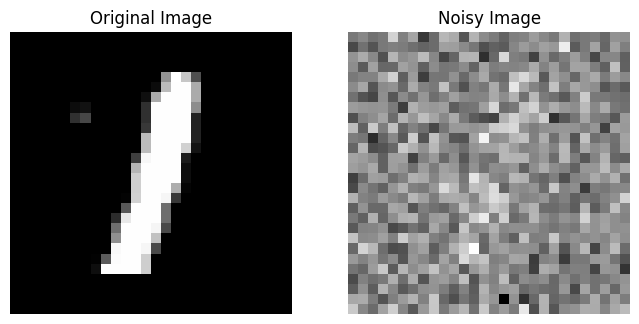

Noisy image saved successfully!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torchvision.utils import save_image

# 载入 MNIST 数据集
mnist_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

# 从数据集中随机选择一张图片
index = np.random.randint(len(mnist_dataset))
image, label = mnist_dataset[index]

# 添加高斯噪声
mean = 0
stddev = 0.3
noise = np.random.normal(mean, stddev, image.shape)
noisy_image = image + torch.tensor(noise, dtype=torch.float)

# 显示原始图像和带有噪声的图像
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image.squeeze(), cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Noisy Image')
plt.imshow(noisy_image.squeeze(), cmap='gray')
plt.axis('off')

plt.show()

# 保存带有噪声的图像
save_image(noisy_image, 'noisy_mnist_image.png')
print("Noisy image saved successfully!")
